# 数据预处理

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [2]:
path = 'C:/Study/Dataset/Duolingo LanguageLearning/learning_traces.csv' 

In [3]:
data = pd.read_csv(path)

In [4]:
data.head(20)

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.000000,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.000000,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.000000,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1
5,1.000000,1362076081,27649635,u:FO,de,en,56429751fdaedb6e491f4795c770f5a4,der/der<det><def><m><sg><nom>,4,3,1,1
6,1.000000,1362076081,27649635,u:FO,de,en,1bacf218eaaf9f944e525f7be9b31899,kind/kind<n><nt><sg><nom>,4,4,1,1
7,1.000000,1362082032,444407,u:dDwF,es,en,73eecb492ca758ddab5371cf7b5cca32,bajo/bajo<pr>,3,3,1,1
8,1.000000,1362082044,5963,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,8,6,6,6
9,0.750000,1362082044,5963,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,6,5,4,3


In [5]:
len(data)

1048575

In [6]:
len(data.columns)

12

In [7]:
data.learning_language.value_counts()

learning_language
en    424064
es    271853
fr    154745
de    117036
it     57155
pt     23722
Name: count, dtype: int64

In [8]:
data.ui_language.value_counts()

ui_language
en    624511
es    313261
pt     77854
it     32949
Name: count, dtype: int64

In [9]:
data.isna().sum() 

p_recall             0
timestamp            0
delta                0
user_id              0
learning_language    0
ui_language          0
lexeme_id            0
lexeme_string        0
history_seen         0
history_correct      0
session_seen         0
session_correct      0
dtype: int64

In [10]:
data = data.drop(columns=['lexeme_id']).reset_index(drop=True)

In [11]:
data['prediction'] = data['p_recall'].apply(lambda x: 'yes' if x > 0.7 else 'no')

In [12]:
data['ui_binary'] = data['ui_language'].apply(lambda x: "eng" if x == "en" else "noneng")

In [13]:
data['learning_binary'] = data['learning_language'].apply(lambda x: "eng" if x == "en" else "noneng")

In [14]:
# 将UNIX时间戳转换为可读的日期时间格式
data['datetime'] = pd.to_datetime(data['timestamp'], unit='s')

In [15]:
data['month'] = data.apply(lambda x: pd.to_datetime(x['datetime']).month, axis=1)
data['week'] = data.apply(lambda x: pd.to_datetime(x['datetime']).weekday()+1, axis=1)
# 0为非工作日，1为工作日
data['is_workday'] = data.apply(lambda x: 0 if x['week'] in [6, 7] else 1, axis=1)

In [16]:
data = data.drop(columns=['p_recall','timestamp','lexeme_string','user_id','learning_language','ui_language','datetime','session_correct']).reset_index(drop=True)

In [17]:
data = data[['ui_binary','learning_binary','is_workday','delta','history_seen','history_correct','session_seen','prediction']]

In [18]:
data.head(10)

,ui_binary,learning_binary,is_workday,delta,history_seen,history_correct,session_seen,prediction
0,eng,noneng,1,27649635,6,4,2,yes
1,eng,noneng,1,27649635,4,4,2,no
2,eng,noneng,1,27649635,5,4,1,yes
3,eng,noneng,1,27649635,6,5,2,no
4,eng,noneng,1,27649635,4,4,1,yes
5,eng,noneng,1,27649635,4,3,1,yes
6,eng,noneng,1,27649635,4,4,1,yes
7,eng,noneng,1,444407,3,3,1,yes
8,eng,noneng,1,5963,8,6,6,yes
9,eng,noneng,1,5963,6,5,4,yes


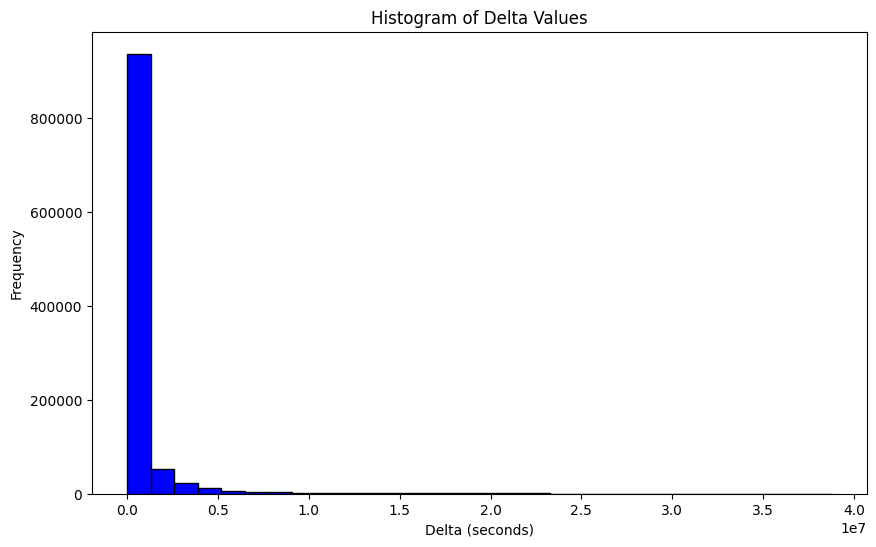

In [19]:
# 对Delta缩放，进行分布检测和标准化
plt.figure(figsize=(10, 6))
plt.hist(data['delta'], bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Delta Values')
plt.xlabel('Delta (seconds)')
plt.ylabel('Frequency')
plt.show()

In [20]:
#大多数之都集中在最大的区间，不适合min-max缩放，考虑使用对数变换，在进行z-score标准化
# 由于数据分布是偏斜的，我们将使用对数变换
# 我们需要确保所有值都是正数，因此对所有值加 1（平移操作）
data['delta_shifted'] = data['delta'] + 1

In [21]:
# 对平移后的数据应用对数变换
data['delta_log'] = np.log(data['delta_shifted'])

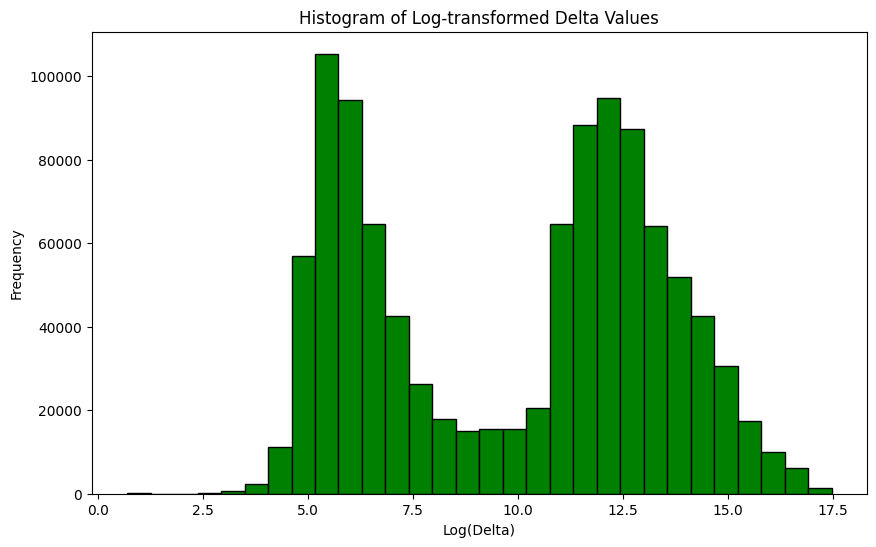

In [22]:
# 绘制对数变换后的数据分布
plt.figure(figsize=(10, 6))
plt.hist(data['delta_log'], bins=30, color='green', edgecolor='black')
plt.title('Histogram of Log-transformed Delta Values')
plt.xlabel('Log(Delta)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# 对对数变换后的数据进行 Z-score 标准化
data['delta_log_normalized'] = zscore(data['delta_log'])

In [24]:
data = data.drop(columns=['delta_shifted','delta_log','delta']).reset_index(drop=True)

In [25]:
data.rename(columns={'delta_log_normalized': 'delta'}, inplace=True)

# 特征分析


In [26]:
data.prediction.value_counts()

prediction
yes    908754
no     139821
Name: count, dtype: int64

In [27]:
# import seaborn as sns
# import numpy as np
# import matplotlib.pyplot as plt

# corr= data.corr(method='pearson')
# corr = data.corr(method='spearman')

# mask = np.zeros_like(corr, dtype=np.bool_)
# mask[np.triu_indices_from(mask)] = True
# plt.figure(figsize=(24,24), dpi=200)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, annot_kws={'size':12, 'color':'black'}, vmax=0.4, vmin=0, fmt='0.2f')
# plt.show()

In [28]:
data.head(10)

,ui_binary,learning_binary,is_workday,history_seen,history_correct,session_seen,prediction,delta
0,eng,noneng,1,6,4,2,yes,2.086076
1,eng,noneng,1,4,4,2,no,2.086076
2,eng,noneng,1,5,4,1,yes,2.086076
3,eng,noneng,1,6,5,2,no,2.086076
4,eng,noneng,1,4,4,1,yes,2.086076
5,eng,noneng,1,4,3,1,yes,2.086076
6,eng,noneng,1,4,4,1,yes,2.086076
7,eng,noneng,1,3,3,1,yes,0.893326
8,eng,noneng,1,8,6,6,yes,-0.351509
9,eng,noneng,1,6,5,4,yes,-0.351509
